In [1]:
import meep as mp
import numpy as np
import math

cell_size = mp.Vector3(2,2,2)

# A hexagon is defined as a prism with six vertices centered on the origin
vertices = [mp.Vector3(-1,0),
            mp.Vector3(-0.5,math.sqrt(3)/2),
            mp.Vector3(0.5,math.sqrt(3)/2),
            mp.Vector3(1,0),
            mp.Vector3(0.5,-math.sqrt(3)/2),
            mp.Vector3(-0.5,-math.sqrt(3)/2)]

geometry = [mp.Sphere(vertices, height=1.0, material=mp.Medium(index=3.5)),
            mp.Cone(radius=1.0, radius2=0.1, height=2.0, material=mp.air)]

sim = mp.Simulation(resolution=50,
                    cell_size=cell_size,
                    geometry=geometry)

sim.init_sim()

eps_data = sim.get_epsilon()

-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 3D dimensions.
Computational cell is 2 x 2 x 2 with resolution 50
     prism, center = (0,0,0.5)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 6 vertices:
          (-1,0,0)
          (-0.5,0.866025,0)
          (0.5,0.866025,0)
          (1,0,0)
          (0.5,-0.866025,0)
          (-0.5,-0.866025,0)
          dielectric constant epsilon diagonal = (12.25,12.25,12.25)
     cone, center = (0,0,0)
          radius 1, height 2, axis (0, 0, 1)
          radius2 0.1
          dielectric constant epsilon diagonal = (1,1,1)
subpixel-averaging is 41.347% done, 5.68229 s remaining
subpixel-averaging is 69.203% done, 1.78384 s remaining
subpixel-averaging is 39.9882% done, 6.00695 s remaining
subpixel-averaging is 67.0677% done, 1.96951 s remaining
subpixel-averaging is 41.8323% done, 5.5732 s remaining
subpixel-averaging is 71.6295% done, 1.58598 s remaining
time for set_epsilon = 32.

/tmp/ipykernel_5156/1964043618.py:9: UserWarning: No contour levels were found within the data range.
  s = ax.contour3D(X,Y,Z[:,:,i],cmap='YlGnBu')


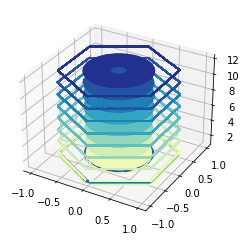

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure()
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, y)
Z = eps_data
ax = plt.axes(projection='3d')
for i in range(100):
    s = ax.contour3D(X,Y,Z[:,:,i],cmap='YlGnBu')

In [5]:
help(mp.Medium)

Help on class Medium in module meep.geom:

class Medium(builtins.object)
 |  Medium(epsilon_diag=Vector3<1.0, 1.0, 1.0>, epsilon_offdiag=Vector3<0.0, 0.0, 0.0>, mu_diag=Vector3<1.0, 1.0, 1.0>, mu_offdiag=Vector3<0.0, 0.0, 0.0>, E_susceptibilities=[], H_susceptibilities=[], E_chi2_diag=Vector3<0.0, 0.0, 0.0>, E_chi3_diag=Vector3<0.0, 0.0, 0.0>, H_chi2_diag=Vector3<0.0, 0.0, 0.0>, H_chi3_diag=Vector3<0.0, 0.0, 0.0>, D_conductivity_diag=Vector3<0.0, 0.0, 0.0>, D_conductivity_offdiag=Vector3<0.0, 0.0, 0.0>, B_conductivity_diag=Vector3<0.0, 0.0, 0.0>, B_conductivity_offdiag=Vector3<0.0, 0.0, 0.0>, epsilon=None, index=None, mu=None, chi2=None, chi3=None, D_conductivity=None, B_conductivity=None, E_chi2=None, E_chi3=None, H_chi2=None, H_chi3=None, valid_freq_range=FreqRange(min=-1e+20, max=1e+20))
 |  
 |  This class is used to specify the materials that geometric objects are made of. It
 |  represents an electromagnetic medium which is possibly nonlinear and/or dispersive.
 |  See also [Mate